# 2. Análisis de los datos

**Alumno:** José Luis Aguilera Luzania

## Contenido
---

**Introducción**
- ¿Qué es la detección de noticias falsas? (*Fake news*).
- Objetivo de la libreta.

**Análisis de los datos**
- Librería.
- Datos adicionales para la librería `nltk`.
- Cargar los datos.
- Información de los datos.
- Comprobar los tipos.
- Comprobar si faltan valores.
- Cantidad de noticias según la categoría.
- Cantidad de noticias según el tema.
- Cantidad de noticias según el tema y la categoría.
- ¿Cuáles son las fuentes?

**Word Cloud**
- ¿Qué es?
- Palabras vacías o *stopwords* en español.
- Función para generar *word clouds*
- *Word cloud* de todas las noticias.
- *Word cloud* de todas las noticias sobre entretenimiento.
- *Word cloud* de todas las noticias sobnre salud.

## Introducción
---

#### ¿Qué es la detección de noticias falsas? (*Fake News*)

La detección de noticias falsas (Fake News) es la tarea de evaluar la veracidad de las afirmaciones en las noticias. Este es un problema crítico en el Procesamiento del Lenguaje Natural (PLN) porque tanto en medios de noticias tradicionales como en medios digitales las Fake News generan un gran impacto social y político en cada individuo. Por ejemplo, la exposición a las Fake News puede generar actitudes de ineficacia, alienación y cinismo hacia ciertos candidatos políticos (Balmas, 2014).

#### Objetivo de la libreta

El objetivo de esta libreta es conocer mejor los datos, no solo su estructura, también su comportamiento y características para decidir que puede ser útil al momento de resolver el problema de clasificar las noticias.

## Análisis de los datos
---

#### Librerías

Manipulación de datos:
- `pandas`: Librería para manipular los datos de forma tabular.
- `cmd`: Librería para controlar el formato de impresión en la consola.

Procesamiento del lenguaje natural:
- `nltk`: Librería para utilizar técnicas de procesamiento del lenguaje natural.

Representación de los datos:
- `wordcloud`: Librería para generar una nube de palabras y guardarla como imagen *.png*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
import re
import cmd
import nltk


from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud
from nltk.corpus import stopwords

#### Datos adicionales para la librería `nltk`

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JoseLuisAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JoseLuisAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Cargar los datos

El conjunto de datos se encuentra en el archivo *datos.csv*.

In [3]:
corpus = pd.read_csv('Datos/corpus_spanish_v3.csv', index_col=0)

#### Información del conjunto de datos

In [4]:
print(f'News, Columns: {corpus.shape}')
print('True News: {}'.format(corpus.groupby('Category').size()[0]))
print('Fake News: {}'.format(corpus.groupby('Category').size()[1]))
print(f'Columns Name: {list(corpus.columns)}')

corpus.head()

News, Columns: (3974, 6)
True News: 1928
Fake News: 2046
Columns Name: ['Category', 'Topic', 'Source', 'Headline', 'Text', 'Link']


,Category,Topic,Source,Headline,Text,Link
0,True,Science,El país,La NASA recupera el contacto con un satélite d...,La NASA recupera el contacto con un satélite d...,https://elpais.com/elpais/2018/02/01/ciencia/1...
1,True,Economy,El financiero,AMLO aceleraría el consumo y el crecimiento ec...,AMLO aceleraría el consumo y el crecimiento ec...,http://www.elfinanciero.com.mx/economia/amlo-a...
2,Fake,Sport,actualidadpanamericana.com,Compañero de James se ‘calvea’ y le juega pesa...,Al borde de un colapso nervioso quedó el hábil...,http://www.actualidadpanamericana.com/companer...
3,Fake,Politics,actualidadpanamericana.com,Dian gravará este año a los niños que recojan ...,"Mediante pupitrazo de último minuto anoche, el...",http://www.actualidadpanamericana.com/dian-gra...
4,Fake,Politics,actualidadpanamericana.com,Uribe asegura que insultó 358 guerrilleros,Muy temprano esta mañana el expresidente y aho...,http://www.actualidadpanamericana.com/uribe-as...


#### Comprobar los tipos

In [5]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 3973
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  3974 non-null   object
 1   Topic     3974 non-null   object
 2   Source    3974 non-null   object
 3   Headline  3974 non-null   object
 4   Text      3974 non-null   object
 5   Link      3974 non-null   object
dtypes: object(6)
memory usage: 217.3+ KB


#### Comprobar si faltan valores

In [6]:
corpus.isnull().sum()

Category    0
Topic       0
Source      0
Headline    0
Text        0
Link        0
dtype: int64

#### Cantidad de noticias según la categoría

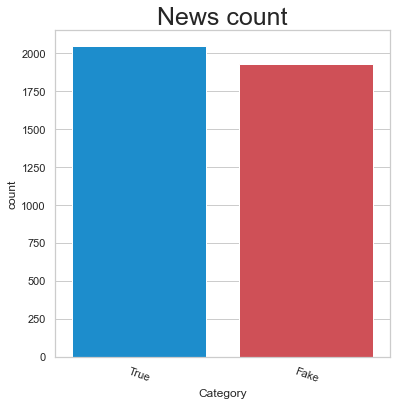

In [7]:
# Colores.
color_verdaderas = '#0095e9'
color_falsas = '#e43b44'

# Plot.
plt.figure(figsize=(6,6))
sns.set(style='whitegrid')
ax = sns.countplot(x = 'Category', data=corpus, palette=[color_verdaderas, color_falsas])
plt.title('News count', fontsize = 25)
plt.xticks(rotation = -20)

# Guardar el plot.
plt.savefig('Plots/plt_news_count.png')

#### Cantidad de noticias según el tema

El conjunto de datos cuenta con 9 temas.

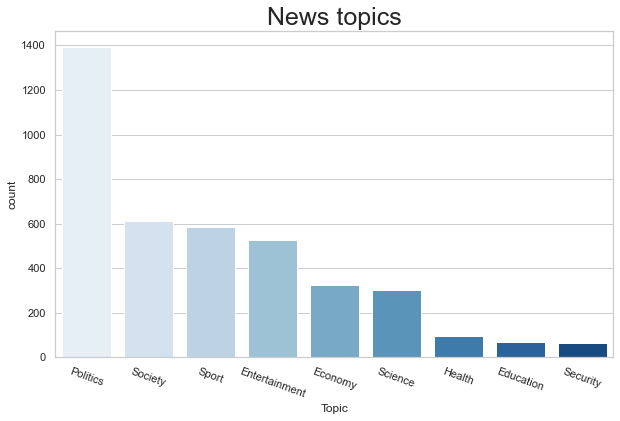

In [8]:
# Colores
color_verdaderas = '#0095e9'
color_falsas = '#e43b44'

# Plot.
topics_order = corpus['Topic'].value_counts().index

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
ax = sns.countplot(x='Topic', order=topics_order, data=corpus, palette='Blues')
plt.title('News topics', fontsize = 25)
plt.xticks(rotation = -20)

#Guardar el plot.
plt.savefig('Plots/plt_news_topic.png')


In [9]:
corpus['Topic'].value_counts()

Politics         1394
Society           614
Sport             584
Entertainment     528
Economy           323
Science           302
Health             97
Education          67
Security           65
Name: Topic, dtype: int64

#### Cantidad de noticias según el tema y la categoría

Para obtener la cantidad de las noticias falsas y verdaderas se deben seguir los siguientes pasos:

1. Separar las noticias con categoría verdadera.
2. Generar un diccionario de las noticias agrupadas por tema.
3. Generar un *dataframe* a partir del diccionario.
4. Repetir los tres pasos anteriores para la categoría de noticias falsas.
5. Unir los dos *dataframe* resultantes.
6. Graficar el *dataframe* resultado.

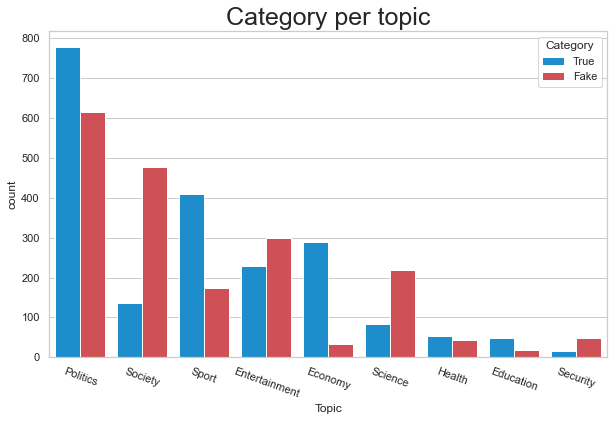

In [10]:
# Plot.
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
ax = sns.countplot(x = 'Topic', order=topics_order, hue='Category', data=corpus, palette=[color_verdaderas, color_falsas])
plt.title('Category per topic', fontsize = 25)
plt.xticks(rotation = -20)

#Guardar el plot.
plt.savefig('Plots/plt_category_topic.png')


**El sesgo de los datos**

Como se observa en la gráfica anterior, la cantidad de noticias sobre política es mayor a la cantidad de los otros temas, esto implica que nuestros modelos serán mejor clasificando noticias sobre política que de cualquier otro tema.


#### ¿Cuáles son las fuentes?

Para intentar obtener las fuentes se realizan estos pasos:
1. Obtener todos los valores de la columna *fuente*.
2. Eliminar todas las fuentes repetidas.
3. Imprimir las fuentes.

In [11]:
def process_source(source_text):
    text = source_text
    text = re.sub(r'http\S+', "", text)
    text = re.sub(r'http', "", text)
    text = re.sub(r'@\S+', "", text)
    text = re.sub(r'\n', "", text)
    text = re.sub(r"(?<!\n)\n(?!\n)", " ", text)
    text = re.sub(r'[ -]+', " ", text)
    text = re.sub(r' +', " ", text)
    text = text.replace(r"*PHONE*", "número")
    text = text.replace(r"*EMAIL*", "email")
    text = text.replace(r"*URL*", "url")
    text = text.lower()
    text = unidecode.unidecode(text)
    text = re.sub(r'^.*?\.', '', text)
    text = re.sub(r'\.[a-z]+', "", text)

    return text

In [12]:
# 1.
sources = corpus['Source'].apply(process_source)
sources_ls = sources.to_list()

# 2.
sources_ls = list(sorted(set(sources_ls)))

# 3.
cli = cmd.Cmd()
cli.columnize(sources_ls, displaywidth=110)

                    el buen tono               heraldo de mexico     newsner                  uno cero   
0                   el clarin                  hipertextual          nippon                   voz del sur
20 minutos          el coleccionista de datos  hispantv              noticieros televisa      yahoo      
abc                 el dizque                  hola                  novedades quitana roo  
abc el recreo       el economista              hola mexico           opinion                
abc noticias        el espectador              huffingtonpost        pan tweet              
abc sociedad        el financiero              huffpost              parabolica             
actualidad rt       el grafico                 inciclopedia          people en espanol      
alerta digital      el heraldo                 info bae              playgroundmag          
animal politico     el librero de gutenberg    jornada               proceso                
animal politico     el manana  

## Word Cloud
---

#### ¿Qué es?

*Word Cloud* es una representación visual de las palabras que forman un texto, donde el tamaño es mayor para las palabras que aparecen con más frecuencia.

#### Palabras vacías o *stopwords* en español

Las *stopwords* o palabras vacías son aquellas que carecen de sentido de manera individual o sin una palabra clave o *keyword*. Algunos ejemplos son: el, la, ellos, ustedes, para, ser, etc.

Se utilizan las *stopwords* proporcionadas por la librería `nltk` en conjunto con las obtenidas del repositorio "stopwords-es" del usuario [genediazjr](https://github.com/stopwords-iso/stopwords-es)

In [13]:
# Obtener las stopwords.
stopwords_spanish_nltk = stopwords.words('spanish')
stopwords_spanish_json = list(pd.read_json('Datos/stopwords-es.json')[0])

# Se concatenan las stopwords, se crea un set para eliminar repetidos y sé genera una lista.
stopwords_spanish = list(set(stopwords_spanish_nltk+stopwords_spanish_json))

#### Función para generar *word clouds*

In [14]:
def generate_word_cloud(text, filename):

    # Colores.
    colors = ["#0095e9", "#124e89"]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors)

    # Generar el WordCloud.
    wordcloud = WordCloud(width=900, height=300, stopwords = stopwords_spanish, background_color = "white", colormap = cmap).generate(text)

    # Plot.
    plt.figure()
    plt.figure(figsize=(15,15))
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud, interpolation='bilinear')

    # Guardar el Plot.
    path = 'Plots/Word-Cloud/' + filename
    plt.savefig(path)

#### Word Cloud de todas las noticias

<Figure size 432x288 with 0 Axes>

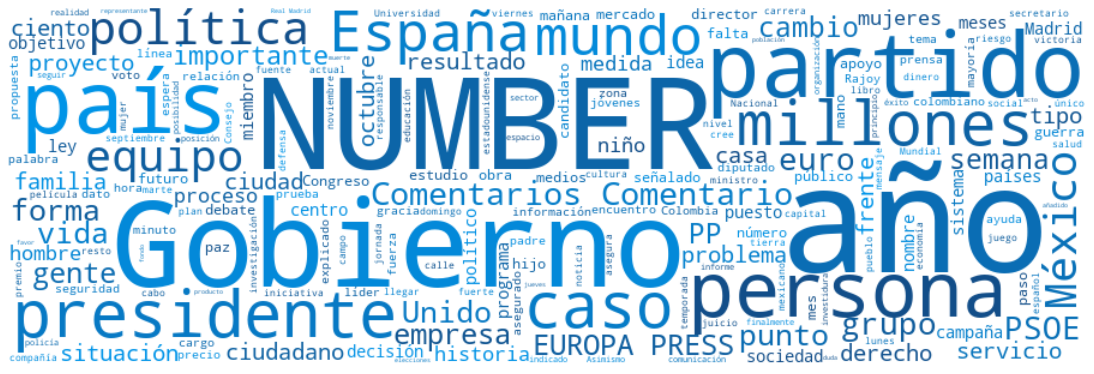

In [15]:
text = " ".join(text for text in corpus.Text)
generate_word_cloud(text=text, filename='wc_news_all.png')

#### Word Cloud de todas las noticias sobre entretenimiento

<Figure size 432x288 with 0 Axes>

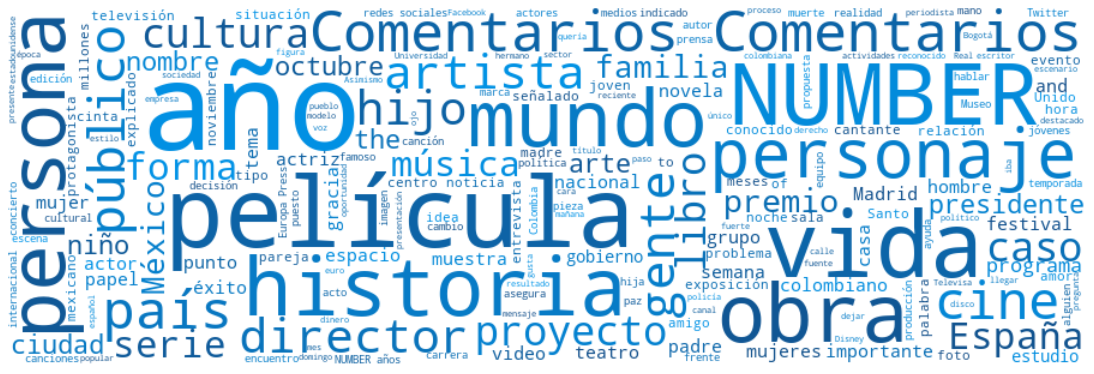

In [16]:
df = corpus[corpus['Topic'] == 'Entertainment']
text = " ".join(text for text in df.Text)
generate_word_cloud(text=text, filename='wc_news_entertaiment_all.png')

#### Word Cloud de todas las noticias sobre salud

<Figure size 432x288 with 0 Axes>

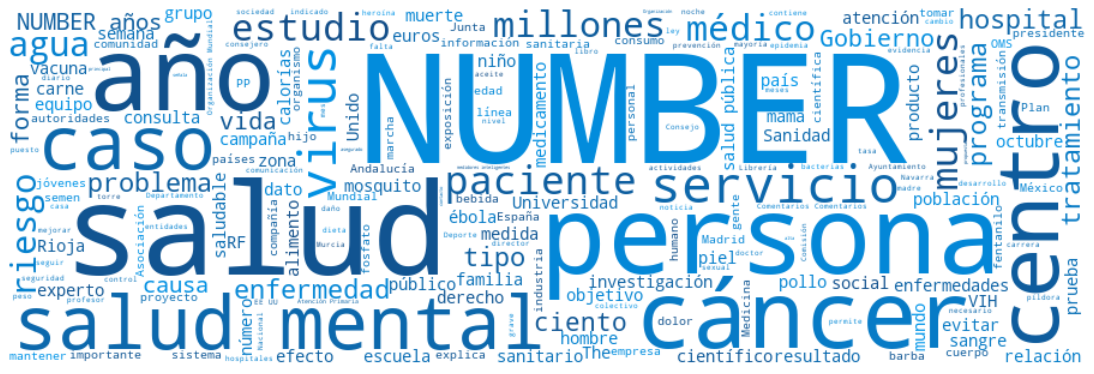

In [17]:
df = corpus[corpus['Topic'] == 'Health']
text = " ".join(text for text in df.Text)
generate_word_cloud(text=text, filename='wc_news_health_all.png')